# **The eighth in-class-exercise (20 points in total, 10/29/2020)**

The data for this exercise is from the dataset you created from assignment three. Please perform answer the following questions based on your data:

## (1) (10 points) Write a python program to extract the sentiment related terms from the corpus. You may use python package such as polyglot or external lexicon resources in the question. Rank the sentiment related terms by frequency.

In [11]:
# Write your code here

import numpy as np
import pandas as pd
import nltk
data = pd.read_csv("/content/Sentiment Analysis.csv")
data = data[['Content_txt','Sentiment']].copy()




In [12]:
data.head()

,Content_txt,Sentiment
0,Amazon laptop exist,Positive
1,looking for laptop,positive
2,for his wife,positive
3,SSD atleat 16GB,Positive
4,i5 prosseor,poitive


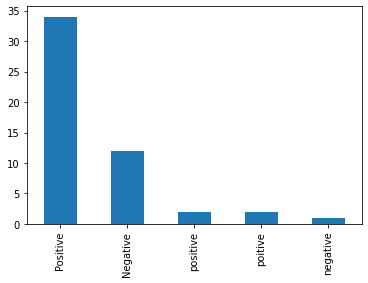

In [13]:
import matplotlib.pyplot as plt
data['Sentiment'].value_counts().plot(kind='bar')


In [16]:
import nltk
from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from textblob import Word
from wordcloud import WordCloud, STOPWORDS
from textblob import TextBlob
import string
stop = stopwords.words('english')


data['Content_txt'] = data['Content_txt'].apply(lambda x: " ".join(x.lower() for x in x.split()))
data['Content_txt'] = data['Content_txt'].apply(lambda  x: " ".join(x for x in x.split() if x not in string.punctuation))
data['Content_txt'] = data['Content_txt'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))
data['Content_txt'] = data['Content_txt'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [55]:
from nltk.tokenize import word_tokenize

words_sentence = []
for sentence in data['Content_txt']:
  words_sentence.append(word_tokenize(sentence))
words_sentence[:8]

[['amazon', 'laptop', 'exist'],
 ['looking', 'laptop'],
 ['wife'],
 ['ssd', 'atleat', '16gb'],
 ['i5', 'prosseor'],
 ['comfortable'],
 ['price'],
 ['window']]

In [89]:
import itertools
aftercleaning = [x for x in words_sentence if x != []]
iterations = list(itertools.chain.from_iterable(aftercleaning))
iterations[:8]

['amazon', 'laptop', 'exist', 'looking', 'laptop', 'wife', 'ssd', 'atleat']

In [21]:
sentiment_list = data.to_records(index=False)
sentiment_list = list(sentiment_list)
sentiment_list[:4]

[('amazon laptop exist', 'Positive'),
 ('looking laptop', 'positive'),
 ('wife', 'positive'),
 ('ssd atleat 16gb', 'Positive'),
 ('i5 prosseor', 'poitive')]

In [22]:
def document_features(document):
    document_words = set(document)
    features = {}
    for word in iterations:
        features['contains({})'.format(word)] = (word in document_words)
    return features

In [56]:
featuresets = [(document_features(d), c) for (d,c) in sentiment_list]
train_set, test_set = featuresets[:40], featuresets[40:]
classifier = nltk.NaiveBayesClassifier.train(train_set)
print(nltk.classify.accuracy(classifier, test_set))

0.9090909090909091


In [57]:
classifier.show_most_informative_features(8)

Most Informative Features
        contains(screen) = False          Negati : Positi =      1.0 : 1.0
           contains(ssd) = False          Negati : Positi =      1.0 : 1.0
       contains(useless) = False          Negati : Positi =      1.0 : 1.0
        contains(effici) = False          Negati : Positi =      1.0 : 1.0
            contains(i5) = False          Negati : Positi =      1.0 : 1.0
      contains(prosseor) = False          Negati : Positi =      1.0 : 1.0
         contains(price) = False          Negati : Positi =      1.0 : 1.0
        contains(window) = False          Negati : Positi =      1.0 : 1.0


## (2) (10 points) Compare the performance of the following tools in sentiment identification: TextBlob (https://textblob.readthedocs.io/en/dev/), VADER (https://github.com/cjhutto/vaderSentiment), TFIDF-based Support Vector Machine (SVM) (Split your data into training and testing data). Take your own annotation as the standard answers. 

Reference code: https://towardsdatascience.com/fine-grained-sentiment-analysis-in-python-part-1-2697bb111ed4

In [69]:


from textblob import TextBlob
values=[]
for i in data['Content_txt']:
  blob = TextBlob(i)
  for sentencepolarity in blob.sentences:
    values.append(sentencepolarity.polarity)
neutral=0
pos=0
neg=0
for i in values:
  if i==0.0:
    neutral+=1
  elif i>0:
    pos+=1
  else: neg+=1

    
print("positive",pos)
print("negative",neg)
print("neutral",neutral)

positive 3
negative 2
neutral 46


In [71]:
# Write your code here

!pip install vaderSentiment
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
sentimentanalyser = SentimentIntensityAnalyzer()
def sentiment_analyzer(sentencepolarity):
    count_sentiment = analyser.polarity_scores(sentence)
    print("{:-<20} {}".format(sentencepolarity, str(count_sentiment)))
for i in data['Content_txt'][:8]:
  sentiment_analyzer(i)









amazon laptop exist- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
looking laptop------ {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
wife---------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
ssd atleat 16gb----- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
i5 prosseor--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
comfortable--------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
price--------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}
window-------------- {'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound': 0.0}


In [88]:
train=data[:40]
test=data[40:]
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(min_df = 1,
                             max_df = 0.4,
                             sublinear_tfid = True,
                             use_idf = True)
sentiment_train_vectors = vectorizer.fit_transform(train['Content_txt'])
sentiment_test_vectors = vectorizer.transform(test['Content_txt'])

In [85]:
import time
from sklearn import svm
from sklearn.metrics import classification_report
classifiertdif_linear = svm.SVC(kernel='linear')
tdif0 = time.time()
classifiertdif_linear.fit(sentiment_train_vectors, train['Sentiment'])
tdif1 = time.time()
prediction_linear = classifiertdif_linear.predict(sentiment_test_vectors)
tdif2 = time.time()
time_linear_train = tdif1-tdif0
time_linear_predict = tdif2-tdif1
print("Training time: %fs; Prediction time: %fs" % (time_linear_train, time_linear_predict))
result = classification_report(test['Sentiment'], prediction_linear, output_dict=True)


Training time: 0.006916s; Prediction time: 0.000247s


In [ ]:
# Your analysis here

Out from the analysis I have observed that the ratio of positive and negative over the count are varied, when it comes to the count in th etexblog we see that the positive scenarios are more so the Textblog is appropriate.
When it comes to the Vader we see the values displayed where the negative values are in more so its inappropriate. When it comes to the SVM even the values to taht of f values they are accurate when it comes to the poitive values. Overall from the conclusion we can see that the values of texblob are accurate when compared to that of SVM and Vader.
